In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import norm

# PYTHON/NUMPY
**1. Write functions to compute the mean, and standard deviation of a list of data**

**2. Use scipy.stats.norm to sample from the normal(gaussian) distribution. Compute the mean, and standard deviation of your set of samples using your functions, and with the built in numpy methods. Verify you get the expected results (you know what these values should be if you sample from a normal distribution).**

**3. Plot a histogram of your samples.**

checking my calculated std and mean vs the expected:
my calculated mean:  0.011688541832287638
np given mean:  0.011688541832287678
my calculated std:  0.9968503736170138
np given std:  0.9968503736170117


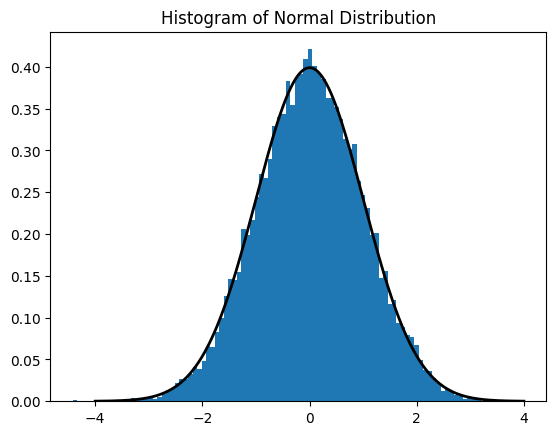

In [4]:
#make data to work with
mu = 0 #mean
sigma = 1 #standard deviation
samples = norm.rvs(loc=mu,scale=sigma,size=20000)

#my function to calculate mean
def myMean (input):
    return sum(input)/ len(input)

#my function to calculate standard deviation
def mySTD (input):
    mean = myMean(input)
    variance = sum((x-mean)**2 for x in input) / len(input)
    return np.sqrt(variance)

#checking i got the values i wanted
print("checking my calculated std and mean vs the expected:")
myMeanVal = myMean(samples)
mySTDVal = mySTD(samples)
print("my calculated mean: ", myMeanVal)
print("np given mean: ", np.mean(samples))
print("my calculated std: ", mySTDVal)
print("np given std: ", np.std(samples))

#plotting histogram of my samples
#NOTE: small difference in my calculated variables and the predicted is because of the limitations of floating-point arithmetic
plt.hist(samples, bins=100,density=True)
plt.title("Histogram of Normal Distribution")
x = np.arange(mu-4*sigma,mu+4*sigma,0.001)
pdf = norm.pdf(x, loc=mu, scale=sigma) #add pdf curve to graph
plt.plot(x, pdf, linewidth=2, color="k")




# DATA EXPLORATION/ANALYSIS

Grab a year's worth of hourly SLC PM2.5 data in CSV form from here (at the bottom)

Pick one of the monitoring stations from the dataset and perform your analysis from the readings from that station.

Plot the readings from that station over the course of a year

You'll find that there's so much data that it's a slightly difficult to gain much insignt from this visualization. We want to explore the variation of pollution levels over time, looking at 2 different timescales.

Plot the mean pm2.5 level for each month using a bar chart. Note any insights you can gain from this visualization.

Next, group the data by time of day (by hour), and plot the mean pollution level for each hour. What insights can you draw from this view of the data?

The mean only gives us a very coarse view of the monthly/hourly data. Use Box and Whisker plots of the monthly and hourly data groupings to provide a more complete view of the data. Does this view provide any additional insights?

In [5]:
# Load the CSV file
data = pd.read_csv("2020Air.csv", sep=',', engine='python', encoding='utf-8', header=1)

# Remove columns that start with 'Unnamed'
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Create new column names
new_columns = ['dateTime'] + [f'hour{i+1}' for i in range(len(data.columns) - 1)]
data.columns = new_columns

# Convert dateTime column to datetime format
data['dateTime'] = pd.to_datetime(data['dateTime'], format='%m/%d/%Y %H:%M')

# Extract month and calculate mean pm2.5 level for each month
data['month'] = data['dateTime'].dt.month
monthly_means = data.groupby('month').mean(numeric_only=True)


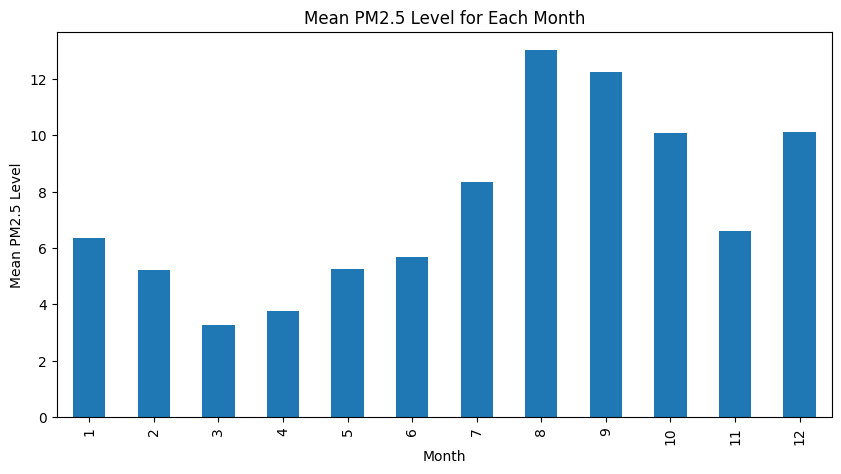

In [6]:
# Plot mean pm2.5 level for each month
plt.figure(figsize=(10, 5))
monthly_means.mean(axis=1).plot(kind='bar')
plt.title('Mean PM2.5 Level for Each Month')
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 Level')
plt.show()

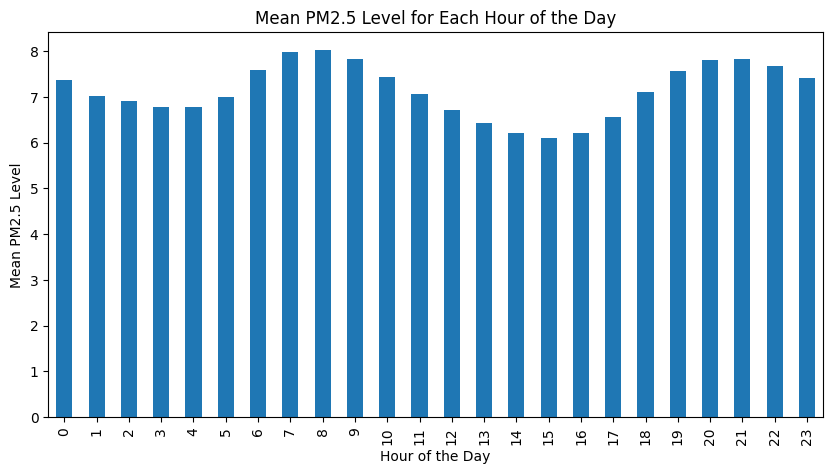

In [7]:
# Extract hour and calculate mean pollution level for each hour
data['hour'] = data['dateTime'].dt.hour
hourly_means = data.groupby('hour').mean(numeric_only=True)

# Plot mean pollution level for each hour
plt.figure(figsize=(10, 5))
hourly_means.mean(axis=1).plot(kind='bar')
plt.title('Mean PM2.5 Level for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean PM2.5 Level')
plt.show()

<Figure size 1200x600 with 0 Axes>

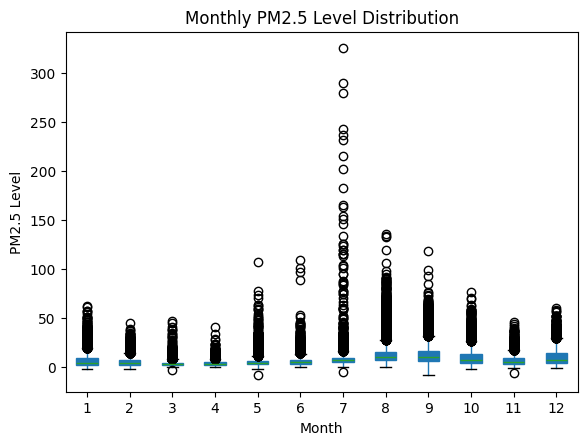

<Figure size 1200x600 with 0 Axes>

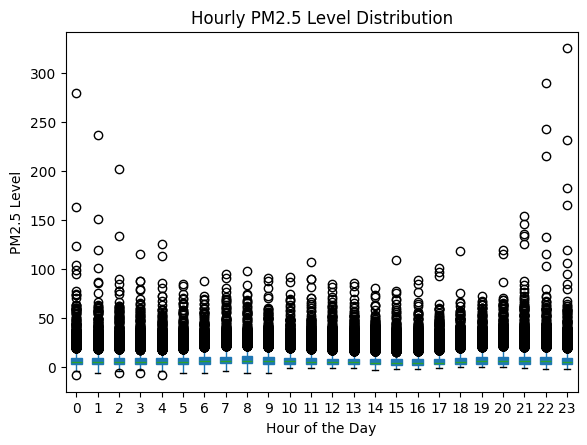

In [16]:

# Melt the dataframe to have a 'variable' and 'value' column for easier plotting
melted_data = data.melt(id_vars=['dateTime', 'month', 'hour'], var_name='hour_of_day', value_name='pm2_5')

# Set the style to default
plt.style.use('default')

# Function to create box and whisker plot for monthly data
def plot_monthly_boxplot(data):
    plt.figure(figsize=(12, 6))
    boxplot = data.boxplot(column='pm2_5', by='month', grid=False, patch_artist=True)
    plt.title('Monthly PM2.5 Level Distribution')
    plt.suptitle('')
    plt.xlabel('Month')
    plt.ylabel('PM2.5 Level')
    plt.show()

# Function to create box and whisker plot for hourly data
def plot_hourly_boxplot(data):
    plt.figure(figsize=(12, 6))
    boxplot = data.boxplot(column='pm2_5', by='hour', grid=False, patch_artist=True)
    plt.title('Hourly PM2.5 Level Distribution')
    plt.suptitle('')
    plt.xlabel('Hour of the Day')
    plt.ylabel('PM2.5 Level')
    plt.show()

# Plot the box and whisker plots
plot_monthly_boxplot(melted_data)
plot_hourly_boxplot(melted_data)
